## Шаг 1. Подключение библиотек

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Шаг 2. Обучение линейной модели

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Шаг 2.1 Обучение полиномиальной модели

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Шаг 3 Предсказание, обработка и визуализация результатов

[100.05732004] [105.23116103]


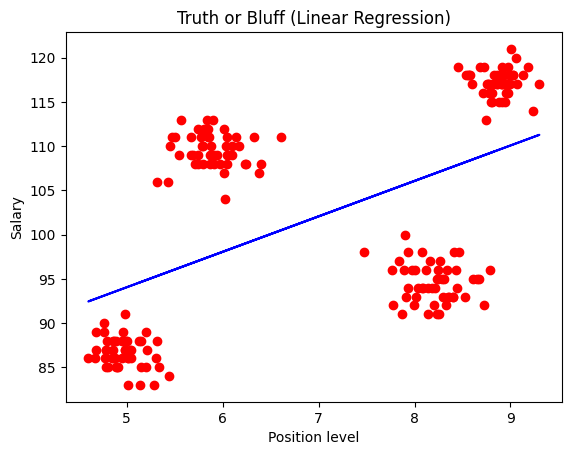

In [18]:
y_pred_lin = lin_reg.predict([[6.5]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

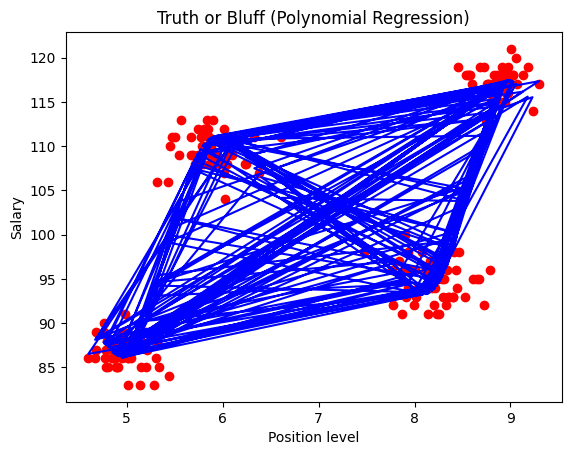

In [20]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-22-77fba5a1cf4b>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


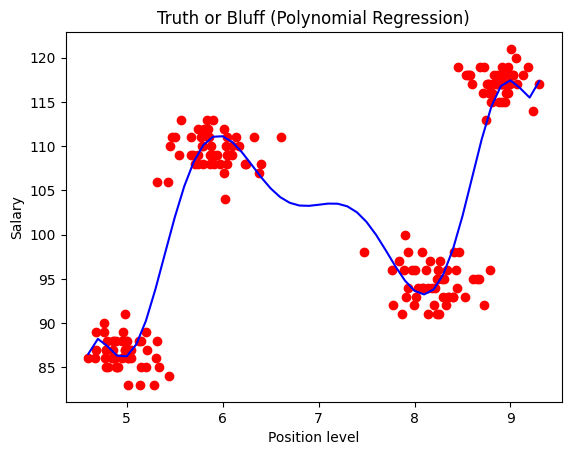

In [22]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Индивидуальное задание

1. Постройте модель полиномиальной регрессии с использованием.Проанализируйте кривые аппроксимации при различных степенях полинома.

## Шаг 1. Загрузка данных

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Загружаем данные
data = pd.read_csv('ex_22.csv')
data.head()

,time,input_voltage,el_power
0,880.3,3.0,1193.140713
1,881.3,3.0,1107.066421
2,882.3,3.0,1180.406767
3,883.3,3.0,1095.551498
4,884.3,3.0,1177.073719


## Шаг 2. Определение переменных, линейная регрессия

In [77]:
X = data[['input_voltage']].values  # Признаки
y = data['el_power'].values      # Целевая переменная
lin_reg = LinearRegression()
lin_reg.fit(X, y)

## Шаг 3. Полиномиальная регрессия для различных степеней полинома

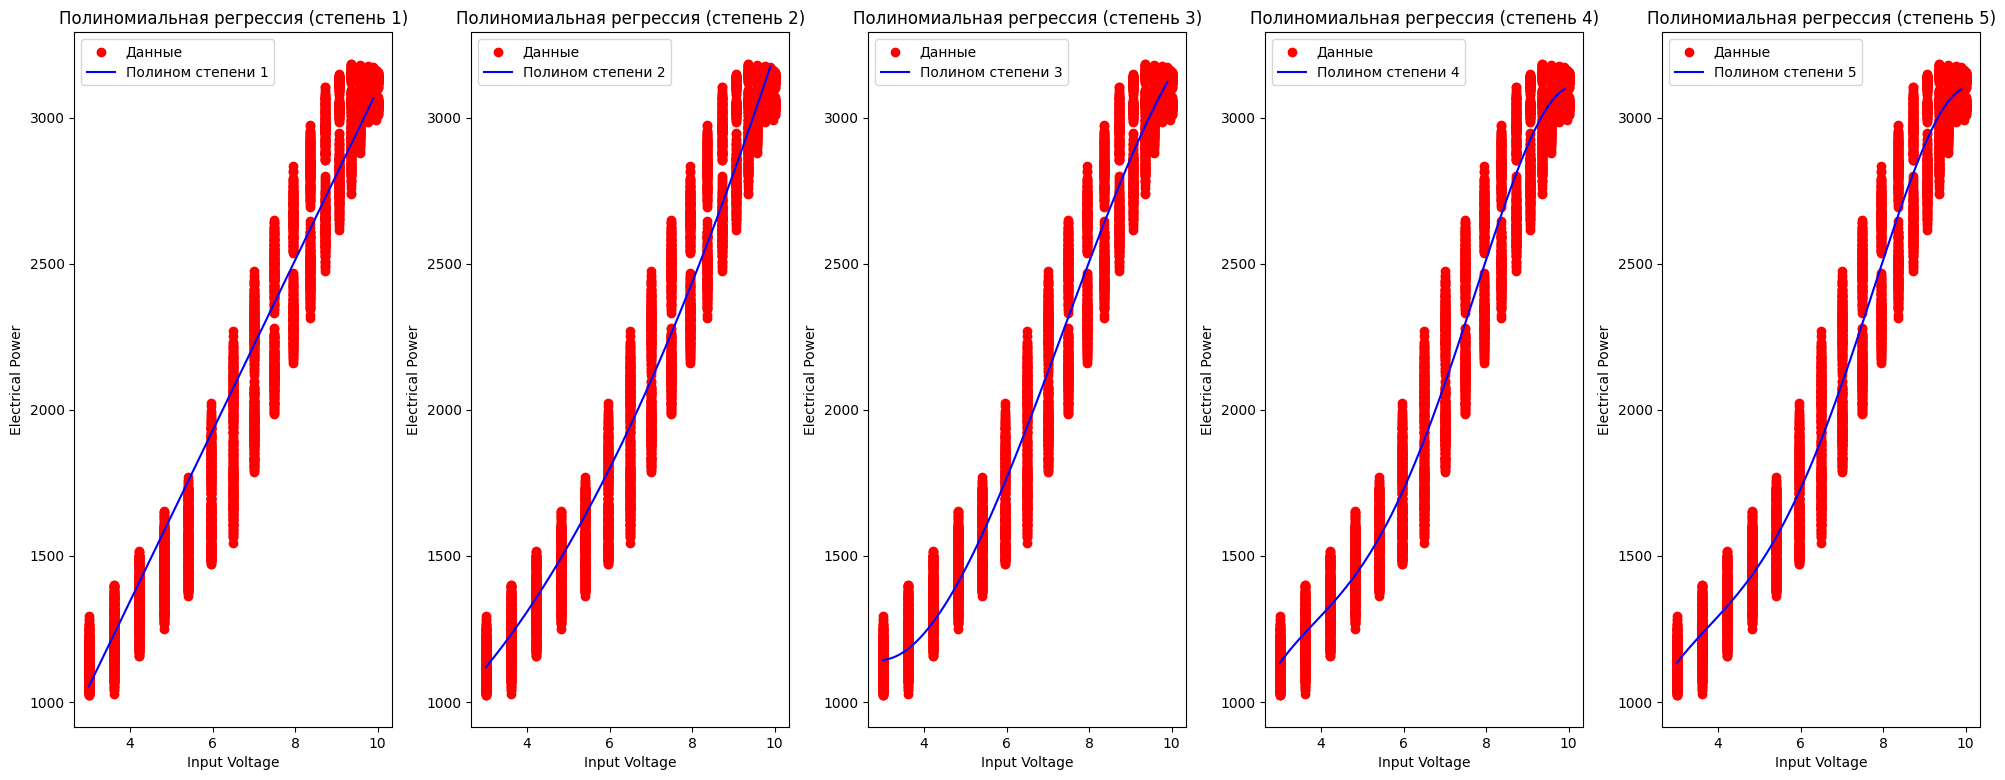

In [84]:
degrees = [1, 2, 3, 4, 5]  # Перечислил степени полинома
plt.figure(figsize=(20, 15))  # Настройка размера графика

# Цикл по степеням полинома
for i, degree in enumerate(degrees, 1):
    # Создание полиномиальных признаков
    # Этот объект преобразует исходные данные X в полиномиальные признаки
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X) # Метод fit_transform(X) обучает преобразователь и применяет его к данным X, создавая полиномиальные признаки X_poly

    # Обучение полиномиальной регрессии
    lin_reg_poly = LinearRegression() # Создаем объект линейной регрессии
    lin_reg_poly.fit(X_poly, y) # Обучение его на полиномиальных признаках и целевом признаке y

    # Генерация кривой для текущей модели
    # Делаем это с помощью np.arange(), который создает значения от минимального до максимального значения в X с шагом 0.1.
    X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.1).reshape(-1, 1) # Преобразуем массив в форму с одним столбцом
    y_pred = lin_reg_poly.predict(poly_reg.transform(X_grid)) # Вычисляем предсказания для каждого X_grid с использованием обученной модели lin_reg_poly

    # Построение графика
    plt.subplot(2, 5, i)  # Создаем сетку 2x5 для графиков
    plt.scatter(X, y, color='red', label='Данные')
    plt.plot(X_grid, y_pred, color='blue', label=f'Полином степени {degree}')
    plt.title(f'Полиномиальная регрессия (степень {degree})')
    plt.xlabel('Input Voltage')
    plt.ylabel('Electrical Power')
    plt.legend()

plt.tight_layout()  # Чтобы графики не накладывались друг на друга
plt.show()

In [86]:
# Вывод метрик для анализа
from sklearn.metrics import mean_squared_error, r2_score

print("Анализ метрик для различных степеней полинома:")
# Перебор списка степеней полинома
for degree in degrees:
  # Для каждой степени полинома создается объект PolynomialFeatures с текущей степенью полинома.
    poly_reg = PolynomialFeatures(degree=degree)
    # fit_transform(X) преобразует входные данные X в полиномиальные признаки.
    X_poly = poly_reg.fit_transform(X)
    lin_reg_poly = LinearRegression() # Создается объект модели линейной регрессии.
    lin_reg_poly.fit(X_poly, y) # Модель обучается на полиномиальных признаках X_poly и реальных значениях y.
    y_pred = lin_reg_poly.predict(X_poly) # С помощью обученной модели делаются предсказания на полиномиальных признаках X_poly.
    mse = mean_squared_error(y, y_pred) # Веквадратичную ошибку, которая показывает, насколько предсказания модели отклоняются от реальных значений.
    r2 = r2_score(y, y_pred) # вычисляет коэффициент детерминации R^2, который показывает, какую долю вариативности данных объясняет модель.
    print(f"Степень полинома: {degree}")
    print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
    print(f"Коэффициент детерминации (R²): {r2:.2f}\n")

Анализ метрик для различных степеней полинома:
Степень полинома: 1
Среднеквадратичная ошибка (MSE): 24376.07
Коэффициент детерминации (R²): 0.96

Степень полинома: 2
Среднеквадратичная ошибка (MSE): 17365.59
Коэффициент детерминации (R²): 0.97

Степень полинома: 3
Среднеквадратичная ошибка (MSE): 15003.10
Коэффициент детерминации (R²): 0.98

Степень полинома: 4
Среднеквадратичная ошибка (MSE): 14102.01
Коэффициент детерминации (R²): 0.98

Степень полинома: 5
Среднеквадратичная ошибка (MSE): 14100.53
Коэффициент детерминации (R²): 0.98



## Вывод

С увеличением степени полинома среднеквадратичная ошибка (MSE) постепенно уменьшается, что говорит о лучшем приближении модели к данным.
Коэффициент детерминации (R²) растет и достигает высоких значений уже начиная со второй степени полинома, что показывает, что модель хорошо описывает зависимость в данных.